# Bacalhau Docker Image


[![stars - badge-generator](https://img.shields.io/github/stars/bacalhau-project/bacalhau?style=social)](https://github.com/bacalhau-project/bacalhau)

This example shows you how to run some common client-side Bacalhau tasks using the Bacalhau Docker image.

## TD;LR
Running Docker image on Bacalhau

## Prerequisites

To get started, you need to install the Bacalhau client, see more information [here](https://docs.bacalhau.org/getting-started/installation)

In [1]:
!command -v bacalhau >/dev/null 2>&1 || (export BACALHAU_INSTALL_DIR=.; curl -sL https://get.bacalhau.org/install.sh | bash)
path=!echo $PATH
%env PATH=./:{path[0]}

Your system is linux_amd64

BACALHAU CLI is detected:
Client Version: v0.3.29
Server Version: v0.3.29
Reinstalling BACALHAU CLI - ./bacalhau...
Getting the latest BACALHAU CLI...
Installing v0.3.29 BACALHAU CLI...
Verified OK
Extracting tarball ...
NOT verifying Bin
bacalhau installed into . successfully.
Client Version: v0.3.29
Server Version: v0.3.29
env: PATH=./:/home/gitpod/.pyenv/versions/3.11.1/bin:/home/gitpod/.pyenv/libexec:/home/gitpod/.pyenv/plugins/python-build/bin:/home/gitpod/.pyenv/shims:/ide/bin/remote-cli:/home/gitpod/.nix-profile/bin:/home/gitpod/.local/bin:/home/gitpod/.sdkman/candidates/maven/current/bin:/home/gitpod/.sdkman/candidates/java/current/bin:/home/gitpod/.sdkman/candidates/gradle/current/bin:/workspace/.cargo/bin:/home/gitpod/.rvm/gems/ruby-3.2.1/bin:/home/gitpod/.rvm/gems/ruby-3.2.1@global/bin:/home/gitpod/.rvm/rubies/ruby-3.2.1/bin:/home/gitpod/.pyenv/shims:/workspace/go/bin:/home/gitpod/.nix-profile/bin:/ide/bin/remote-cli:/home/gitpod/go/bin:/home/gitp

## Pull the Docker image

The first step is to pull the Bacalhau Docker image from the [Github container registry](https://github.com/orgs/bacalhau-project/packages/container/package/bacalhau).

In [2]:
%%bash
docker pull ghcr.io/bacalhau-project/bacalhau:latest

latest: Pulling from bacalhau-project/bacalhau
Digest: sha256:d80f1fe751886a29e0d5ae265a88abbfcd5c59e36247473b66aba93ea24f45aa
Status: Image is up to date for ghcr.io/bacalhau-project/bacalhau:latest
ghcr.io/bacalhau-project/bacalhau:latest


You can also pull a specific version of the image, e.g.:

```bash
docker pull ghcr.io/bacalhau-project/bacalhau:v0.3.16
```

:::warning
Remember that the "latest" tag is just a string. It doesn't refer to the latest version of the Bacalhau client, it refers to an image that has the "latest" tag. Therefore, if your machine has already downloaded the "latest" image, it won't download it again. To force a download, you can use the `--no-cache` flag.
:::

## Check version

Check the version of the Bacalhau client you are using.


In [3]:
%%bash
docker run -t ghcr.io/bacalhau-project/bacalhau:latest version

Client Version: v0.3.29
Server Version: v0.3.29


## Running a Bacalhau Job

To submit a bi to Bacalhau, we use the `bacalhau docker run` command. 

In [4]:
%%bash --out job_id
docker run -t ghcr.io/bacalhau-project/bacalhau:latest \
    docker run \
        --id-only \
        --wait \
        ubuntu:latest -- \
            sh -c 'uname -a && echo "Hello from Docker Bacalhau!"'

In this example, I run an ubuntu-based job that echo's some stuff.

### Structure of the command

-  `--id-only......`: Output only the job id

- `ubuntu:latest.` Ubuntu container

- `ghcr.io/bacalhau-project/bacalhau:latest `: Name of the Bacalhau Docker image

When a job is submitted, Bacalhau prints out the related `job_id`. We store that in an environment variable so that we can reuse it later on.

In [5]:
%env JOB_ID={job_id}

env: JOB_ID=738e0b39-8f73-4f01-ab46-245e8479ad65


To print out the content of the Job ID, run the following command:

In [6]:
%%bash
docker run -t ghcr.io/bacalhau-project/bacalhau:latest \
    describe $JOB_ID \
        | grep -A 2 "stdout: |"

      stdout: |
        Linux 914f42609298 5.19.0-1022-gcp #24~22.04.1-Ubuntu SMP Sun Apr 23 09:51:08 UTC 2023 x86_64 x86_64 x86_64 GNU/Linux
        Hello from Docker Bacalhau!


## Sumbit a Job With Output Files

One inconvenience that you'll see is that you'll need to mount directories into the container to access files. This is because the container is running in a separate environment to your host machine. Let's take a look at the example below:

The first part of the example should look familiar, except for the Docker commands.

In [7]:
%%bash --out job_id
docker run -t ghcr.io/bacalhau-project/bacalhau:latest \
    docker run \
        --id-only \
        --wait \
        --gpu 1 \
        ghcr.io/bacalhau-project/examples/stable-diffusion-gpu:0.0.1 -- \
            python main.py --o ./outputs --p "A Docker whale and a cod having a conversation about the state of the ocean"


When a job is submitted, Bacalhau prints out the related `job_id`. We store that in an environment variable so that we can reuse it later on.

In [8]:
%env JOB_ID={job_id}

env: JOB_ID=bd141e1a-0f68-4a20-886f-c2b30c01b614


## Checking the State of your Jobs

- **Job status**: You can check the status of the job using `bacalhau list`. 

In [ ]:
%%bash
docker run -t ghcr.io/bacalhau-project/bacalhau:latest \
    list $JOB_ID \

When it says `Completed`, that means the job is done, and we can get the results.

- **Job information**: You can find out more information about your job by using `bacalhau describe`.

In [ ]:
%%bash
docker run -t ghcr.io/bacalhau-project/bacalhau:latest \
    describe $JOB_ID \


- **Job download**: You can download your job results directly by using `bacalhau get`. Alternatively, you can choose to create a directory to store your results. In the command below, we created a directory and downloaded our job output to be stored in that directory.

In [17]:
%%bash
rm -rf results && mkdir result

In [ ]:
%%bash
bacalhau get ${JOB_ID} --output-dir result

After the download has finished you should see the following contents in results directory. 

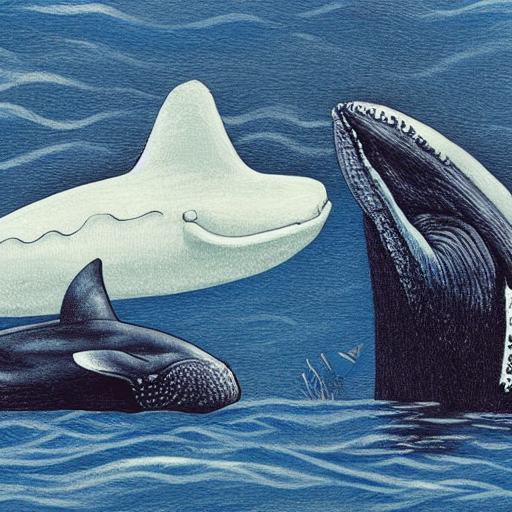

In [20]:
import IPython.display as display
display.Image("result/outputs/image0.png")

## Need Support?

If have questions or need support or guidance, please reach out to the [Bacalhau team via Slack (#bacalhau channel)](https://filecoin.io/slack)
